<a href="https://colab.research.google.com/github/Rlackdals981010/NLP_STUDY_WITH_DL/blob/main/Machine_Learning_Auto__Differential_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y +5
  return z

In [3]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w]) #이게 z = 2w^2+5식에서 w에 대해 자동 미분을 수행함
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [7]:
#위에서 본 자동 미분을 이용한 선형 회귀 구현
w = tf.Variable(4.0) #가중치
b = tf.Variable(1.0) #bias

@tf.function            #@는 python 함수를 TensorFlow 그래프로 변환해주는 역할
def hypothesis(x):      #가설 설정
  return w*x+b

x_test = [3.5,5,5.5,6]
print(hypothesis(x_test).numpy())


[15. 21. 23. 25.]


In [9]:
@tf.function
def mse_loss(y_pred,y):
  return tf.reduce_mean(tf.square(y_pred - y)) #평균 제곱 오차를 손실 함수로 정의함

In [10]:
#공부시간과 성적의 관계를 데이터로 사용
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [12]:
optimizer = tf.optimizers.SGD(0.01) #최적화 함수는 경사하강법. 학습률은 0.01

In [15]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 10.6274 | b의 값 : 1.158 | cost : 1.086207
epoch :  10 | w의 값 : 10.6296 | b의 값 : 1.144 | cost : 1.084126
epoch :  20 | w의 값 : 10.6318 | b의 값 :  1.13 | cost : 1.082212
epoch :  30 | w의 값 : 10.6339 | b의 값 : 1.117 | cost : 1.080443
epoch :  40 | w의 값 : 10.6359 | b의 값 : 1.104 | cost : 1.078820
epoch :  50 | w의 값 : 10.6378 | b의 값 : 1.092 | cost : 1.077324
epoch :  60 | w의 값 : 10.6396 | b의 값 : 1.081 | cost : 1.075944
epoch :  70 | w의 값 : 10.6414 | b의 값 :  1.07 | cost : 1.074675
epoch :  80 | w의 값 : 10.6431 | b의 값 : 1.059 | cost : 1.073502
epoch :  90 | w의 값 : 10.6447 | b의 값 : 1.049 | cost : 1.072428
epoch : 100 | w의 값 : 10.6462 | b의 값 : 1.039 | cost : 1.071433
epoch : 110 | w의 값 : 10.6477 | b의 값 : 1.029 | cost : 1.070525
epoch : 120 | w의 값 : 10.6492 | b의 값 :  1.02 | cost : 1.069683
epoch : 130 | w의 값 : 10.6506 | b의 값 : 1.012 | cost : 1.068906
epoch : 140 | w의 값 : 10.6519 | b의 값 : 1.003 | cost : 1.068192
epoch : 150 | w의 값 : 10.6531 | b의 값 : 0.9955 | cost : 1.067537
epoch :

In [17]:
x_test = [3.5,5,5.5,6]
print(hypothesis(x_test).numpy())

[38.242683 54.243263 59.57679  64.91031 ]


In [24]:
#케라스 사용을 통한 선형 회귀

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 314ms/step - loss: 3169.0361 - mse: 3169.0361
Epoch 2/300
1/1 [==============================] - 0s 11ms/step - loss: 390.9571 - mse: 390.9571
Epoch 3/300
1/1 [==============================] - 0s 12ms/step - loss: 49.1345 - mse: 49.1345
Epoch 4/300
1/1 [==============================] - 0s 15ms/step - loss: 7.0749 - mse: 7.0749
Epoch 5/300
1/1 [==============================] - 0s 12ms/step - loss: 1.8990 - mse: 1.8990
Epoch 6/300
1/1 [==============================] - 0s 12ms/step - loss: 1.2614 - mse: 1.2614
Epoch 7/300
1/1 [==============================] - 0s 11ms/step - loss: 1.1821 - mse: 1.1821
Epoch 8/300
1/1 [==============================] - 0s 11ms/step - loss: 1.1715 - mse: 1.1715
Epoch 9/300
1/1 [==============================] - 0s 11ms/step - loss: 1.1694 - mse: 1.1694
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 1.1684 - mse: 1.1684
Epoch 11/300
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 59ms/step


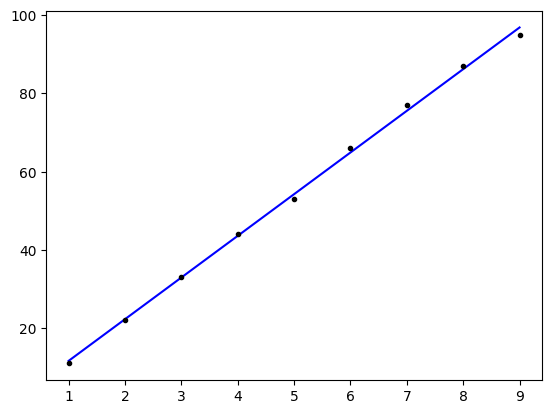

In [25]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [26]:
print(model.predict([9.5])) #결과가 왜.. 이러지..

1/1 [==============================] - 0s 63ms/step
[[102.18674]]
